In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import peak_widths
from scipy.integrate import simps

%matplotlib inline

Подгружаем данные

In [3]:
df = pd.read_csv('data\ExpDat_SK_Clear_resin_entalp5kpm_20-150.txt', sep='\t',comment='#')
df.columns = ['Temp', 'Time', 'DSC', 'Sence']

df.head()

,Temp,Time,DSC,Sence
0,20.01794,0.01,0.022839,3.36733
1,20.01857,0.02,0.022820,3.36733
2,20.02401,0.03,0.022770,3.36734
3,20.03631,0.04,0.022824,3.36735
4,20.05572,0.05,0.023849,3.36737


Text(0.5, 1.0, 'Redundant results within a reasonable range')

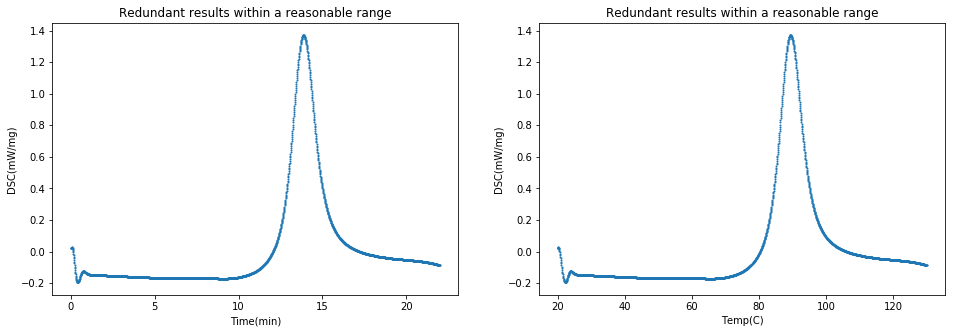

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].set_xlabel("Time(min)")
ax[0].set_ylabel('DSC(mW/mg)')
ax[0].plot(df['Time'], df['DSC'], "o", markersize=1)
ax[0].set_title('Redundant results within a reasonable range')#TODO rename

ax[1].set_xlabel("Temp(C)")
ax[1].set_ylabel('DSC(mW/mg)')
ax[1].plot(df['Temp'], df['DSC'], "o", markersize=1)
ax[1].set_title('Redundant results within a reasonable range')

Давай по искать точки начала и конца пика по температуре - так будет удобнее. На этом графике он будет где-то от 60 до 110

In [5]:
peaks_positive, _ = find_peaks(raw_data['DSC(mW/mg)'], height=1.2)
peaks_width, width_heights, _, _ = peak_widths(raw_data['DSC(mW/mg)'], peaks_positive, rel_height = 0.75)

peak_start = raw_data['DSC(mW/mg)'][raw_data['DSC(mW/mg)']>0.27737123].first_valid_index()
peak_end = raw_data['DSC(mW/mg)'][raw_data['DSC(mW/mg)']>0.27737123].last_valid_index()

peak = raw_data.iloc[peak_start:peak_end]

spent_energy = simps(peak)

print(spent_energy)


NameError: name 'raw_data' is not defined